# Convolutional Neural Networks

Today we focus on basic operations for convolutional layers and on a simple neural network implementation with convolutional layers.

## Operations

In [15]:
import numpy as np
#np.random.seed(42)

# Consider a 2d - window of size 12x12
window = np.random.rand(12, 12)

#trying on matix myself
# matrix = np.random.randint(0,10,size = (12,12))
# print(matrix)
# h = 0
# w = 0
# new_matrix  = matrix[h:h+3,w:w+3]
# max_value = new_matrix.max()
# new_matrix2 = new_matrix.fill(max_value)
# print((new_matrix))
# print(new_matrix.max())
# matrix[h:h+3,w:w+3].fill(max_value)
# print(matrix)


        



### Strides

In [16]:
# Implement the sliding window method used in convolutional layers
# Dont do the convolution itself, just let the window slide

# For that, use a stride of 2
# Use a kernel of size 3x3 and slide over the "window" variable defined in the previous block
# When sliding the kernel over the window with the stride of 2, set always the maximum number of that area to every single entry
# E. g. if the window you are currently slicing over looks like this:
#  3 4 5
#  5 2 6
#  1 7 2
# then it should be transformed into
#  7 7 7
#  7 7 7
#  7 7 7

# Make sure that you update the result always after one complete sliding over the complete window
# so that for every calculation you use the original values

stride = 2
kernel_size = 3
# matrix = np.random.randint(0,10,size = (12,12))

def sliding_stride_set_max(window, kernel_size, stride=1):
    for w in range(0,window.shape[0]-kernel_size +1 ,stride):
        for h in range(0,window.shape[1]-kernel_size + 1,stride):
            new_matrix = window[w:w+kernel_size,h:h+kernel_size]
            max_value = new_matrix.max()
            window[w:w+kernel_size,h:h+kernel_size].fill(max_value)
  
    return window



max_slide_window = sliding_stride_set_max(window=window, kernel_size=kernel_size, stride=stride)

print(max_slide_window)

[[0.6237702  0.6237702  0.8680434  0.8680434  0.8680434  0.8680434
  0.9546699  0.9546699  0.9546699  0.9546699  0.9546699  0.95909079]
 [0.6237702  0.6237702  0.8680434  0.8680434  0.8680434  0.8680434
  0.9546699  0.9546699  0.9546699  0.9546699  0.9546699  0.28291558]
 [0.97252748 0.97252748 0.97252748 0.97252748 0.97252748 0.97252748
  0.97252748 0.97252748 0.97252748 0.97252748 0.97252748 0.50195549]
 [0.97252748 0.97252748 0.97252748 0.97252748 0.97252748 0.97252748
  0.97252748 0.97252748 0.97252748 0.97252748 0.97252748 0.18689123]
 [0.98066466 0.98066466 0.98066466 0.98066466 0.98066466 0.98066466
  0.98066466 0.98066466 0.99400303 0.99400303 0.99400303 0.65714078]
 [0.98066466 0.98066466 0.98066466 0.98066466 0.98066466 0.98066466
  0.98066466 0.98066466 0.99400303 0.99400303 0.99400303 0.42280152]
 [0.98066466 0.98066466 0.98066466 0.98066466 0.98066466 0.98066466
  0.99400303 0.99400303 0.99400303 0.99400303 0.99400303 0.54385735]
 [0.98066466 0.98066466 0.98066466 0.980664

### Padding

In [17]:
# Implement a padding of zeros to the following numpy array
to_pad = np.random.randn(6, 6)
matrix_to_pad = np.random.randint(0,10,size = (6,6))
print(to_pad)

# The zero padding should pad the array on every side with size 2
# So that they output array of the 6x6 array is of shape 10x10
padding_size = 2

# Your code here
#padding = np.pad(matrix_to_pad,padding_size,mode= 'constant')
padding = np.pad(to_pad,padding_size,mode= 'constant')
print(padding.shape)
print(padding)


[[ 0.35049326 -1.57418394  0.93824887  1.40959815  0.00474703  0.63430204]
 [ 0.81038922  0.53345852  1.92870132  0.55912057  1.44523499  0.45009815]
 [-1.36493646  0.41665852 -0.50383384  0.58275796 -0.97576646 -0.32214564]
 [ 1.51208019  0.0482147   1.59081334  1.13612125  0.78284221  0.5123183 ]
 [ 0.17968104 -0.68080329  0.76400692 -0.47664316  0.85662649 -1.54882565]
 [-0.45163657 -0.06906478  0.40211904  1.57506781  1.58681776  0.10058813]]
(10, 10)
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.35049326 -1.57418394  0.93824887  1.40959815
   0.00474703  0.63430204  0.          0.        ]
 [ 0.          0.          0.81038922  0.53345852  1.92870132  0.55912057
   1.44523499  0.45009815  0.          0.        ]
 [ 0.          0.         -1.36493646  0.41665852 -0.503

### Pooling

In [18]:
# Implement max pooling with the following array (window)
to_pool = np.random.randn(6, 6)

# Implement the max pooling
# Use a stride of 2 and kernel size of 2x2

stride = 2
kernel_size = 2

def max_pooling(window, kernel_size, stride=1):
    assert kernel_size >= stride
    assert len(window.shape) == 2
    assert window.shape[0] % kernel_size == 0
    assert window.shape[1] % kernel_size == 0

    m , n = window.shape

    pooling_matrix= np.zeros((m//stride,n//stride))

    for i in range(0,m-kernel_size+1,stride):
        for j in range(0,n-kernel_size+1,stride):
            pooling_matrix[i // stride , j // stride ] = np.max(window[i:i+stride,j:j+stride])


    return pooling_matrix

pooling = max_pooling(window=to_pool, kernel_size=kernel_size, stride=stride)
print(pooling)

[[0.96822093 0.471453   1.00026618]
 [2.30767958 1.64536608 0.45469676]
 [0.68758917 0.9463683  0.4192782 ]]


## First CNN PyTorch implementation

In [19]:
# 1) Implement a small neural network with convolutional layers

# 2) Implement a small neural network with linear layers (as in previous practicals)
    # make sure that the networks from 1) and 2) have around the same amount of parameters, to make them comparable to each other
# 3) Compare the accuracy with the networks from previous practicals, can you improve the accuracy with conv layers?





### MNIST dataset

/var/folders/w0/ynzbkd_s00db7zl4yrnnry7h0000gn/T/ipykernel_13670/1717886939.py:37: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


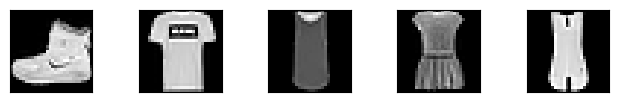

In [20]:
# Use the FashionMNIST dataset as in previous practicals

import torch
torch.manual_seed(42)
torch.cuda.manual_seed(42)
import torchvision
import torchvision.transforms as transforms
import tqdm
import matplotlib.pyplot as plt


def load_fashion_mnist_data(root_path='./data', batch_size=4):
    transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize((0.5), (0.5))]
    )

    train_dataset = torchvision.datasets.FashionMNIST(root=root_path, train=True, download=True, transform=transform)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

    test_dataset = torchvision.datasets.FashionMNIST(root=root_path, train=False, download=True, transform=transform)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    return train_loader, test_loader, train_dataset, test_dataset


def plot_fashsion_mnist_images():
    _, _, train_dataset, _ = load_fashion_mnist_data()

    # get first x items
    no = 5
    images = [train_dataset.__getitem__(i)[0].permute(1,2,0) for i in range(0, no)]

    start_pos = 0
    for i in range(no):
        plt.subplot(1, no, i+1)
        plt.tight_layout()
        plt.imshow(images[i], cmap='gray', interpolation='none')
        plt.xticks([])
        plt.yticks([])
    plt.show()

plot_fashsion_mnist_images()

### Training and evaluation methods

In [21]:
# the operate method calls the train and eval method
# so you only have to call the operate method and pass
# the parameters to train and evaluate your model in one line
import torch
from typing import Callable
from torch.optim import Optimizer
from torch.utils.data import DataLoader
import torch.nn as nn

def train_model(
    model: nn.Module, loss_fn: Callable, optimizer: Optimizer,
    train_data_loader: DataLoader, epoch: int, batch_size: int = 4, epochs: int = 10, device: torch.device = 'cpu'
):
    # turn training mode on
    model.train()

    running_loss = []
    running_accuracy = []
    for imgs, targets in tqdm.tqdm(train_data_loader, desc=f'Training iteration {epoch + 1}'):
        imgs, targets = imgs.to(device=device), targets.to(device=device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(imgs)
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss.append(loss.item())

        # Calculate the Accuracy (how many of all samples are correctly classified?)
        max_outputs = torch.max(outputs, dim=1).indices
        accuracy = (max_outputs.detach() == targets.detach()).to(dtype=torch.float32).mean()
        running_accuracy.append(accuracy)

    running_loss_iterations = []
    running_accuracy_iterations = []
    for i in range(0, len(running_loss), batch_size * 20):
        j = i + (batch_size * 20)
        running_loss_iterations.append(torch.mean(torch.as_tensor(running_loss[i:j])))
        running_accuracy_iterations.append(torch.mean(torch.as_tensor(running_accuracy[i:j])))
    
    return torch.mean(torch.as_tensor(running_loss)), torch.mean(torch.as_tensor(running_accuracy)) , torch.as_tensor(running_loss_iterations), torch.as_tensor(running_accuracy_iterations)



def eval_model(
    model: nn.Module, loss_fn: Callable, val_data_loader: DataLoader, epoch: int, batch_size: int = 4, device: torch.device = 'cpu'
):
    # turn evaluation mode on
    model.eval()

    with torch.no_grad():
        running_loss = []
        running_accuracy = []
        for imgs, targets in tqdm.tqdm(val_data_loader, desc=f'Evaluation iteration {epoch + 1}'):
            imgs, targets = imgs.to(device=device), targets.to(device=device)

            # forward + backward + optimize
            outputs = model(imgs)
            loss = loss_fn(outputs, targets)

            # print statistics
            running_loss.append(loss.item())

            # Calculate the Accuracy (how many of all samples are correctly classified?)
            max_outputs = torch.max(outputs, dim=1).indices
            accuracy = (max_outputs.detach() == targets.detach()).to(dtype=torch.float32).mean()
            running_accuracy.append(accuracy)
    


    running_loss_iterations = []
    running_accuracy_iterations = []
    for i in range(0, len(running_loss), batch_size * 20):
        j = i + (batch_size * 20)
        running_loss_iterations.append(torch.mean(torch.as_tensor(running_loss[i:j])))
        running_accuracy_iterations.append(torch.mean(torch.as_tensor(running_accuracy[i:j])))
    
    return torch.mean(torch.as_tensor(running_loss)), torch.mean(torch.as_tensor(running_accuracy)) , torch.as_tensor(running_loss_iterations), torch.as_tensor(running_accuracy_iterations)


def operate(model: nn.Module, loss_fn: Callable, optimizer: Optimizer,
    train_data_loader: DataLoader, test_data_loader: DataLoader, batch_size: int = 4, epochs: int = 10
):
    t_losses, t_accs, t_iter_losses, t_iter_accs, e_losses, e_accs, e_iter_losses, e_iter_accs = [], [], [], [], [], [], [], []
    for epoch in range(epochs):
        t_loss, t_acc, t_iter_loss, t_iter_acc = train_model(model=model, loss_fn=loss_fn, optimizer=optimizer, train_data_loader=train_data_loader, epoch=epoch, batch_size=batch_size, epochs=epochs)
        t_losses.append(t_loss.item())
        t_accs.append(t_acc.item())
        for i in t_iter_loss:
            t_iter_losses.append(i.item())
        for i in t_iter_acc:
            t_iter_accs.append(i.item())    

        e_loss, e_acc, e_iter_loss, e_iter_acc = eval_model(model=model, loss_fn=loss_fn, val_data_loader=test_data_loader, epoch=epoch, batch_size=batch_size)
        e_losses.append(e_loss.item())
        e_accs.append(e_acc.item())
        for i in e_iter_loss:
            e_iter_losses.append(i.item())
        for i in e_iter_acc:
            e_iter_accs.append(i.item())

        print(f'Training epoch {epoch + 1} finished with loss: {t_loss} and accuracy {t_acc}')
        print(f'Eval epoch {epoch + 1} finished with loss: {e_loss} and accuracy {e_acc}')
    
    return t_losses, t_accs, t_iter_losses, t_iter_accs, e_losses, e_accs, e_iter_losses, e_iter_accs

### Method to count the parameters of a model

In [22]:
# pass your model to this function to get the trainable parameters (weights) of your model
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

### Some hyperparameters

In [23]:
# Init the datasets
batch_size = 4
train_data_loader, test_data_loader, _, _ = load_fashion_mnist_data(batch_size=batch_size)

# set epochs
epochs = 5


## Linear and Conv model

In [24]:
import torch.nn as nn

### Use the implementation of the linear layer model
### and update the layers or extend the layers
### to learn the mnist data
class LinearLayerModel(nn.Module):
    def __init__(self) -> None:
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
    
    def forward(self, imgs):
        imgs = imgs.reshape(imgs.shape[0], -1)

        return self.model(imgs)
    
class LinearLayerModel_bn(nn.Module):
    def __init__(self) -> None:
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(784, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
    
    def forward(self, imgs):
        imgs = imgs.reshape(imgs.shape[0], -1)

        return self.model(imgs)


# Implement your convolutional layer model
class ConvLayerModel(nn.Module):
    def __init__(self) -> None:
        super().__init__()

        self.model = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=3, stride=1),
            # pixels 28 * 28 (input)
            # ((28 - 3)/1) + 1 = 26
            # 26 * 26 = 676 (output)
            nn.ReLU(),
            nn.Conv2d(6, 1, kernel_size=3, stride=1),
            # pixels 26 * 26 (input) 
            # ((26 - 3)/1) + 1 = 24
            # 24 * 24 = 576 (output)
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(576, 10)
        )
    
    def forward(self, imgs):
        return self.model(imgs)
    

# Implement your convolutional layer model
class ConvLayerModel_bn(nn.Module):
    def __init__(self) -> None:
        super().__init__()

        self.model = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=3, stride=1),
            nn.BatchNorm2d(6),
            # pixels 28 * 28 (input)
            # ((28 - 3)/1) + 1 = 26
            # 26 * 26 = 676 (output)
            nn.ReLU(),
            nn.Conv2d(6, 1, kernel_size=3, stride=1),
            nn.BatchNorm2d(1),
            # pixels 26 * 26 (input) 
            # ((26 - 3)/1) + 1 = 24
            # 24 * 24 = 576 (output)
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(576, 10)
        )
    
    def forward(self, imgs):
        return self.model(imgs)

## Train the convolutional model

In [25]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [26]:
from torch.optim import Adam
import torch.nn.functional as F

conv_model = ConvLayerModel()
print(f'Convolutional model has: {count_parameters(conv_model)} parameters to optimize.')
optimizer = Adam(conv_model.parameters(), lr=0.001)

loss_fn = F.cross_entropy

conv_t_losses, conv_t_accs, conv_t_iter_losses, conv_t_iter_accs, conv_e_losses, conv_e_accs, conv_e_iter_losses, conv_e_iter_accs = operate(
#conv_t_losses, conv_t_accs, conv_e_losses, conv_e_accs, = operate(
    model=conv_model, loss_fn=loss_fn, optimizer=optimizer,
    train_data_loader=train_data_loader, test_data_loader=test_data_loader,
    batch_size=batch_size, epochs=epochs
)


Convolutional model has: 5885 parameters to optimize.


Training iteration 1:   0%|          | 0/15000 [00:00<?, ?it/s]

Evaluation iteration 1: 100%|██████████| 2500/2500 [00:17<00:00, 144.03it/s]


Training epoch 1 finished with loss: 0.5204224586486816 and accuracy 0.8141499757766724
Eval epoch 1 finished with loss: 0.4623588025569916 and accuracy 0.8313999772071838


Evaluation iteration 2: 100%|██████████| 2500/2500 [00:14<00:00, 167.44it/s]


Training epoch 2 finished with loss: 0.43874090909957886 and accuracy 0.8432666659355164
Eval epoch 2 finished with loss: 0.44571322202682495 and accuracy 0.8370000123977661


Evaluation iteration 3: 100%|██████████| 2500/2500 [00:11<00:00, 226.48it/s]


Training epoch 3 finished with loss: 0.41429078578948975 and accuracy 0.8511499762535095
Eval epoch 3 finished with loss: 0.44444966316223145 and accuracy 0.8464999794960022


Evaluation iteration 4: 100%|██████████| 2500/2500 [00:13<00:00, 189.91it/s]


Training epoch 4 finished with loss: 0.3968466818332672 and accuracy 0.8577166795730591
Eval epoch 4 finished with loss: 0.4279150366783142 and accuracy 0.845300018787384


Evaluation iteration 5: 100%|██████████| 2500/2500 [00:13<00:00, 187.98it/s]

Training epoch 5 finished with loss: 0.3855203688144684 and accuracy 0.8622999787330627
Eval epoch 5 finished with loss: 0.4484669864177704 and accuracy 0.8442000150680542


## Train the linear layer model

In [27]:
linear_layer_model = LinearLayerModel()
print(f'Linear layer model has: {count_parameters(linear_layer_model)} parameters to optimize.')
optimizer = Adam(linear_layer_model.parameters(), lr=0.001)

loss_fn = F.cross_entropy

ll_t_losses, ll_t_accs, ll_t_iter_losses, ll_t_iter_accs, ll_e_losses, ll_e_accs, ll_e_iter_losses, ll_e_iter_accs = operate(
#conv_t_losses, conv_t_accs, conv_e_losses, conv_e_accs, = operate(
    model=conv_model, loss_fn=loss_fn, optimizer=optimizer,
    train_data_loader=train_data_loader, test_data_loader=test_data_loader,
    batch_size=batch_size, epochs=epochs
)

Linear layer model has: 109386 parameters to optimize.


Training iteration 1:   0%|          | 0/15000 [00:00<?, ?it/s]

Evaluation iteration 1: 100%|██████████| 2500/2500 [00:12<00:00, 205.45it/s]


Training epoch 1 finished with loss: 0.41036441922187805 and accuracy 0.8611000180244446
Eval epoch 1 finished with loss: 0.4484669864177704 and accuracy 0.8442000150680542


Evaluation iteration 2: 100%|██████████| 2500/2500 [00:11<00:00, 214.63it/s]


Training epoch 2 finished with loss: 0.41036441922187805 and accuracy 0.8611000180244446
Eval epoch 2 finished with loss: 0.4484669864177704 and accuracy 0.8442000150680542


Evaluation iteration 3: 100%|██████████| 2500/2500 [00:22<00:00, 111.39it/s]


Training epoch 3 finished with loss: 0.41036441922187805 and accuracy 0.8611000180244446
Eval epoch 3 finished with loss: 0.4484669864177704 and accuracy 0.8442000150680542


Evaluation iteration 4: 100%|██████████| 2500/2500 [00:12<00:00, 194.38it/s]


Training epoch 4 finished with loss: 0.41036441922187805 and accuracy 0.8611000180244446
Eval epoch 4 finished with loss: 0.4484669864177704 and accuracy 0.8442000150680542


Evaluation iteration 5: 100%|██████████| 2500/2500 [00:11<00:00, 211.22it/s]

Training epoch 5 finished with loss: 0.41036441922187805 and accuracy 0.8611000180244446
Eval epoch 5 finished with loss: 0.4484669864177704 and accuracy 0.8442000150680542


## Train the convolutional network with batch normalization

In [28]:



bn_conv_model = ConvLayerModel_bn()
print(f'Convolutional model with batch normalization has: {count_parameters(bn_conv_model)} parameters to optimize.')
optimizer = Adam(bn_conv_model.parameters(), lr=0.001)

loss_fn = F.cross_entropy

bn_conv_t_losses, bn_conv_t_accs, bn_conv_t_iter_losses, bn_conv_t_iter_accs, bn_conv_e_losses, bn_conv_e_accs, bn_conv_e_iter_losses, bn_conv_e_iter_accs = operate(
#conv_t_losses, conv_t_accs, conv_e_losses, conv_e_accs, = operate(
    model=conv_model, loss_fn=loss_fn, optimizer=optimizer,
    train_data_loader=train_data_loader, test_data_loader=test_data_loader,
    batch_size=batch_size, epochs=epochs
)

Convolutional model with batch normalization has: 5899 parameters to optimize.


Training iteration 1:   0%|          | 0/15000 [00:00<?, ?it/s]

Evaluation iteration 1: 100%|██████████| 2500/2500 [00:30<00:00, 81.18it/s] 


Training epoch 1 finished with loss: 0.41036438941955566 and accuracy 0.8611000180244446
Eval epoch 1 finished with loss: 0.4484669864177704 and accuracy 0.8442000150680542


Evaluation iteration 2: 100%|██████████| 2500/2500 [00:26<00:00, 93.33it/s] 


Training epoch 2 finished with loss: 0.41036438941955566 and accuracy 0.8611000180244446
Eval epoch 2 finished with loss: 0.4484669864177704 and accuracy 0.8442000150680542


Evaluation iteration 3: 100%|██████████| 2500/2500 [00:12<00:00, 205.90it/s]


Training epoch 3 finished with loss: 0.41036444902420044 and accuracy 0.8611000180244446
Eval epoch 3 finished with loss: 0.4484669864177704 and accuracy 0.8442000150680542


Evaluation iteration 4: 100%|██████████| 2500/2500 [00:09<00:00, 251.67it/s]


Training epoch 4 finished with loss: 0.41036444902420044 and accuracy 0.8611000180244446
Eval epoch 4 finished with loss: 0.4484669864177704 and accuracy 0.8442000150680542


Evaluation iteration 5: 100%|██████████| 2500/2500 [00:13<00:00, 180.47it/s]

Training epoch 5 finished with loss: 0.41036444902420044 and accuracy 0.8611000180244446
Eval epoch 5 finished with loss: 0.4484669864177704 and accuracy 0.8442000150680542


## Train the linear layer network with batch normalization

In [29]:
bn_linear_layer_model = LinearLayerModel_bn()
print(f'Linear layer model with batch normalization has: {count_parameters(bn_linear_layer_model)} parameters to optimize.')
optimizer = Adam(bn_linear_layer_model.parameters(), lr=0.001)

loss_fn = F.cross_entropy

bn_ll_t_losses, bn_ll_t_accs, bn_ll_t_iter_losses, bn_ll_t_iter_accs, bn_ll_e_losses, bn_ll_e_accs, bn_ll_e_iter_losses, bn_ll_e_iter_accs = operate(
#conv_t_losses, conv_t_accs, conv_e_losses, conv_e_accs, = operate(
    model=conv_model, loss_fn=loss_fn, optimizer=optimizer,
    train_data_loader=train_data_loader, test_data_loader=test_data_loader,
    batch_size=batch_size, epochs=epochs
)

Linear layer model with batch normalization has: 109770 parameters to optimize.


Training iteration 1:   0%|          | 0/15000 [00:00<?, ?it/s]

Evaluation iteration 1: 100%|██████████| 2500/2500 [00:13<00:00, 184.80it/s]


Training epoch 1 finished with loss: 0.41036444902420044 and accuracy 0.8611000180244446
Eval epoch 1 finished with loss: 0.4484669864177704 and accuracy 0.8442000150680542


Evaluation iteration 2: 100%|██████████| 2500/2500 [00:12<00:00, 202.32it/s]


Training epoch 2 finished with loss: 0.41036444902420044 and accuracy 0.8611000180244446
Eval epoch 2 finished with loss: 0.4484669864177704 and accuracy 0.8442000150680542


Evaluation iteration 3: 100%|██████████| 2500/2500 [00:14<00:00, 170.22it/s]


Training epoch 3 finished with loss: 0.41036438941955566 and accuracy 0.8611000180244446
Eval epoch 3 finished with loss: 0.4484669864177704 and accuracy 0.8442000150680542


Evaluation iteration 4: 100%|██████████| 2500/2500 [00:12<00:00, 197.84it/s]


Training epoch 4 finished with loss: 0.41036444902420044 and accuracy 0.8611000180244446
Eval epoch 4 finished with loss: 0.4484669864177704 and accuracy 0.8442000150680542


Evaluation iteration 5: 100%|██████████| 2500/2500 [00:11<00:00, 214.48it/s]

Training epoch 5 finished with loss: 0.41036441922187805 and accuracy 0.8611000180244446
Eval epoch 5 finished with loss: 0.4484669864177704 and accuracy 0.8442000150680542


## Plot the results

In [30]:
# If you did not change the name of return values
# from the operate methods of the different models
# then you only have to execute the following
# cells to visualize the results

In [31]:
# number of elements
import numpy as np
x_vals = np.arange(0, len(conv_t_iter_losses))
x_vals_test_data = [i for i in range(0, len(conv_t_iter_losses), len(x_vals) // len(ll_e_iter_losses))]

ValueError: x and y must have same first dimension, but have shapes (188,) and (160,)

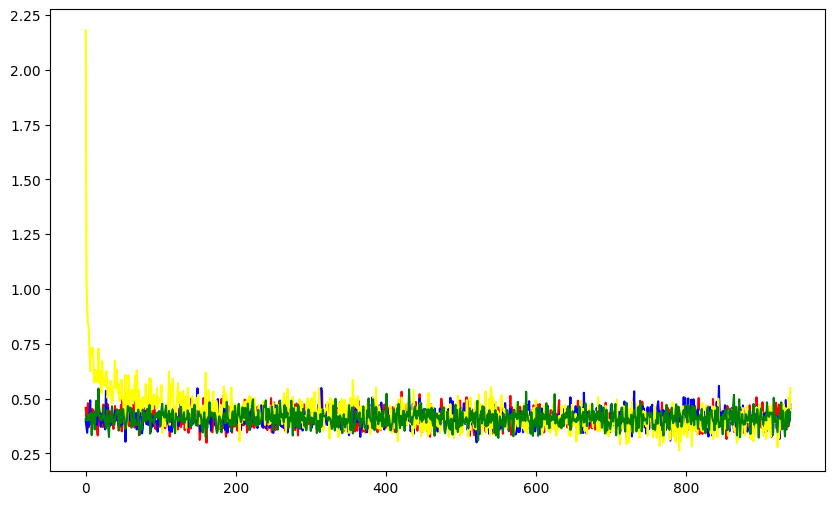

In [32]:
fig = plt.figure(figsize=(10,6))
plt.plot(x_vals, ll_t_iter_losses, label="Linear model (Train)", c="red")
plt.plot(x_vals, bn_ll_t_iter_losses, label="Linear model with batch norm (Train)", c="blue")
plt.plot(x_vals, conv_t_iter_losses, label="Conv model (Train)", c="yellow")
plt.plot(x_vals, bn_conv_t_iter_losses, label="Conv model with batch norm (Train)", c="green")

plt.plot(x_vals_test_data, ll_e_iter_losses, label="Linear model (Test)", linestyle = "dashed", c= "red")
plt.plot(x_vals_test_data, bn_ll_e_iter_losses, label="Linear model with batch norm (Test)", linestyle = "dashed", c="blue")
plt.plot(x_vals_test_data, conv_e_iter_losses, label="Conv model (Test)", linestyle = "dashed", c="yellow")
plt.plot(x_vals_test_data, bn_conv_e_iter_losses, label="Conv model with batch norm (Test)", linestyle = "dashed", c="green")

plt.xlabel('Iterationen * 100')
plt.ylabel('training loss')
plt.title("Training no batch norm vs. batch norm")
plt.legend()
plt.show()
plt.close()

In [ ]:
#sinav sorusu

